In [64]:
# Import pandas for data processing
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


import warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import KMeans

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [65]:
# Read the dataset
student=pd.read_csv('studentclusters.csv')
student.head()

,marks,shours
0,72,20.0
1,42,19.0
2,77,7.0
3,93,22.0
4,30,20.0


In [66]:
Y=student['shours']
yeniY=[]
for i in Y:
    i=int(i)
    yeniY.append(i)
    
yeniY

[20,
 19,
 7,
 22,
 20,
 15,
 8,
 24,
 26,
 7,
 30,
 8,
 18,
 23,
 22,
 16,
 15,
 23,
 17,
 21,
 21,
 7,
 17,
 15,
 18,
 5,
 16,
 14,
 27,
 17,
 3,
 4,
 9,
 2,
 14,
 2,
 16,
 14,
 16,
 10,
 4,
 18,
 23,
 16,
 26,
 17,
 16,
 5,
 21]

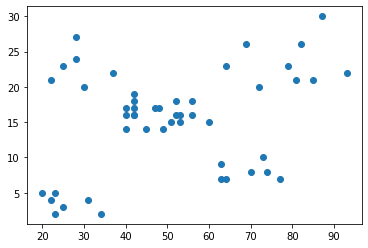

In [67]:
# Visualise the data using Scatter plot
import matplotlib.pyplot as plt
X=student['marks']
Y=yeniY
plt.scatter(X, Y, data=student)
plt.show()

In [68]:
# Fit and Transform the data for MinMax normalization
from sklearn.preprocessing import MinMaxScaler 


In [69]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
rescaledX = scaler.fit_transform(student) 
rescaledX

array([[0.71232877, 0.64285714],
       [0.30136986, 0.60714286],
       [0.78082192, 0.17857143],
       [1.        , 0.71428571],
       [0.1369863 , 0.64285714],
       [0.45205479, 0.46428571],
       [0.73972603, 0.21428571],
       [0.10958904, 0.78571429],
       [0.67123288, 0.85714286],
       [0.60273973, 0.17857143],
       [0.91780822, 1.        ],
       [0.68493151, 0.21428571],
       [0.30136986, 0.57142857],
       [0.80821918, 0.75      ],
       [0.23287671, 0.71428571],
       [0.43835616, 0.5       ],
       [0.42465753, 0.46428571],
       [0.06849315, 0.75      ],
       [0.38356164, 0.53571429],
       [0.89041096, 0.67857143],
       [0.02739726, 0.67857143],
       [0.5890411 , 0.19642857],
       [0.30136986, 0.53571429],
       [0.54794521, 0.46428571],
       [0.49315068, 0.57142857],
       [0.04109589, 0.10714286],
       [0.30136986, 0.5       ],
       [0.2739726 , 0.42857143],
       [0.10958904, 0.89285714],
       [0.36986301, 0.53571429],
       [0.

In [70]:
# import KMeans for clustering
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(student)
y_kmeans

array([0, 1, 0, 2, 4, 1, 0, 4, 0, 0, 2, 0, 1, 2, 4, 1, 1, 4, 1, 2, 4, 0,
       1, 0, 1, 3, 1, 1, 4, 1, 3, 3, 0, 3, 1, 3, 1, 1, 1, 0, 3, 1, 0, 1,
       2, 1, 1, 3, 2])

In [71]:
X=np.array(student)

In [72]:
# Fit the input data. Create labels and get inertia
X[y_kmeans==0,0]

array([72., 77., 74., 69., 64., 70., 63., 60., 63., 73., 64.])

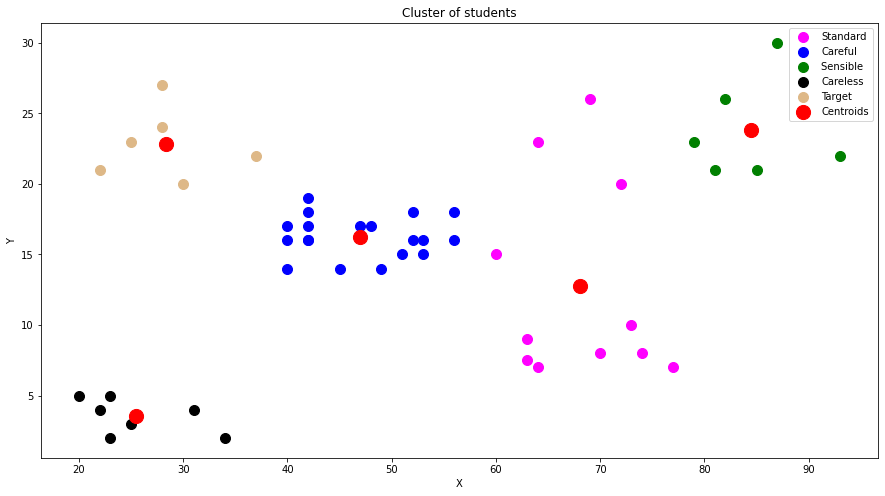

In [73]:
# Visualise the clusters

fig = plt.figure(figsize = (15,8))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='magenta',label='Standard')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Careful')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Sensible ')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='black',label='Careless')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='burlywood',label='Target')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',label='Centroids')
plt.title('Cluster of students')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

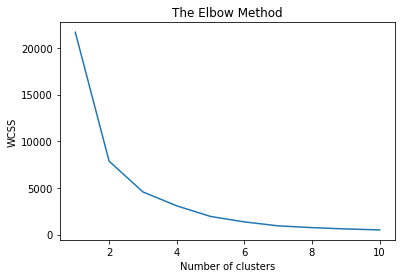

In [74]:
# Elbow method to determine optimum clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()